##Import



In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Load Dataset

In [111]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##Data Preprocessing

In [112]:
df.shape

(150, 5)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [114]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [115]:
df = df[df['species'] != 'setosa'] #Multiclass to Binary class

In [116]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
94,5.6,2.7,4.2,1.3,versicolor
72,6.3,2.5,4.9,1.5,versicolor
95,5.7,3.0,4.2,1.2,versicolor
89,5.5,2.5,4.0,1.3,versicolor
127,6.1,3.0,4.9,1.8,virginica


In [117]:
#Convert categorical to numerical value

df['species'] = df['species'].map(
    {
    'virginica':0,
    'versicolor':1
     }
    )

In [118]:
df['species']

,species
50,1
51,1
52,1
53,1
54,1
...,...
145,0
146,0
147,0
148,0


###Separate feature and Target column


In [119]:
X = df.iloc[:,0:4]
y = df.iloc[:,-1]

In [120]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [121]:
y

,species
50,1
51,1
52,1
53,1
54,1
...,...
145,0
146,0
147,0
148,0


###Split data into training and testing

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

###Model Training

In [124]:
from sklearn.linear_model import LogisticRegression

In [125]:
lgr = LogisticRegression()

In [126]:
lgr.fit(x_train,y_train) #Model training

LogisticRegression()

In [127]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
133,6.3,2.8,5.1,1.5
103,6.3,2.9,5.6,1.8
120,6.9,3.2,5.7,2.3
95,5.7,3.0,4.2,1.2
94,5.6,2.7,4.2,1.3
89,5.5,2.5,4.0,1.3
72,6.3,2.5,4.9,1.5
130,7.4,2.8,6.1,1.9
60,5.0,2.0,3.5,1.0
50,7.0,3.2,4.7,1.4


In [128]:
y_test

,species
133,0
103,0
120,0
95,1
94,1
89,1
72,1
130,0
60,1
50,1


###Predict on train and test data

In [129]:
y_predict_train = lgr.predict(x_train)
y_predict_test = lgr.predict(x_test)

In [130]:
trainingScore = accuracy_score(y_train,y_predict_train)
testingScore = accuracy_score(y_test, y_predict_test)

print("Training Accuracy : ", trainingScore)
print("Testing Accuracy : ", testingScore)

Training Accuracy :  0.975
Testing Accuracy :  0.95


##Conclusion

In [132]:
print("Classification Report:")
print(classification_report(y_test, y_predict_test))
conf_matrix = confusion_matrix(y_test, y_predict_test)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.92      0.96        12

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion Matrix:
 [[ 8  0]
 [ 1 11]]


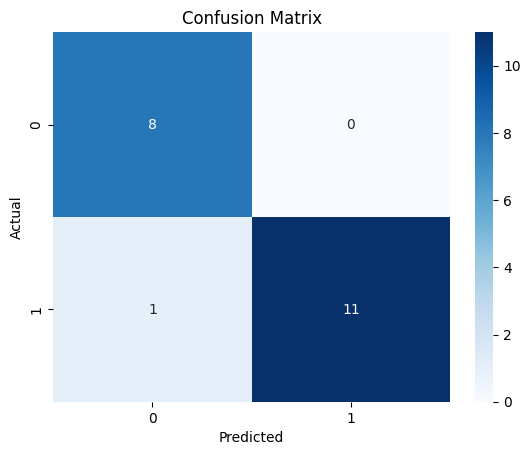

In [133]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

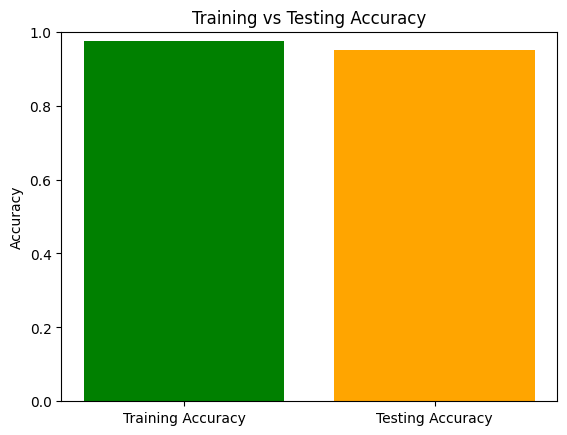

In [134]:
plt.bar(['Training Accuracy', 'Testing Accuracy'], [trainingScore, testingScore], color=['green', 'orange'])
plt.ylim(0, 1)
plt.title("Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.show()